In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from typing import List
import matplotlib
from scipy.ndimage import gaussian_filter1d
# plt.style.use('ggplot')
sns.set_theme(context="notebook", style="darkgrid")
sns.set(font_scale=3.0)
SimHei = matplotlib.font_manager.FontProperties(fname="/usr/share/fonts/font/simhei.ttf")

PROJECT_ROOT_DIR = Path().absolute().parent.parent.parent
PROJECT_ROOT_DIR

PosixPath('/home/ucav/PythonProjects/fly-craft-examples')

In [2]:
def load_data(algo: str, filename: str, seed_str: str, insert_no: int=19, algo_dir: str="rl", smooth_success_rate: bool=True):
    df = pd.read_csv(PROJECT_ROOT_DIR / "logs" / algo_dir / filename / "progress.csv")
    df = df[pd.notnull(df["eval/success_rate"])]
    df.insert(insert_no, "seed", [seed_str] * len(df))
    df.insert(insert_no+1, "algo", [algo] * len(df))

    # 平滑！！！
    if smooth_success_rate:
        # df["eval/success_rate"] = smooth(df["eval/success_rate"], 5)
        df["eval/success_rate"] = gaussian_filter1d(df["eval/success_rate"], sigma=3)

    return df

In [3]:
SMOOTH = False

# generation 1

In [4]:
flycraft_files = [
    "10hz_128_128_2e8steps_easy_1_singleRL", 
    "10hz_128_128_2e8steps_easy_2_singleRL", 
    "10hz_128_128_2e8steps_easy_3_singleRL", 
    "10hz_128_128_2e8steps_easy_4_singleRL",
    "10hz_128_128_2e8steps_easy_5_singleRL",
]
flycraft_seed_strs = [
    "seed 1", 
    "seed 2", 
    "seed 3", 
    "seed 4", 
    "seed 5"
]
df_flycraft = pd.concat([load_data("w/ env designs", filename, seed_str, insert_no=18, algo_dir="rl_single", smooth_success_rate=SMOOTH).iloc[::5] for filename, seed_str in zip(flycraft_files, flycraft_seed_strs)])
print(len(df_flycraft))

1530


In [5]:
pyfly_files = [
    "10hz_128_128_2e8steps_easy_no_terminations_b_1_1_singleRL", 
    "10hz_128_128_2e8steps_easy_no_terminations_b_1_2_singleRL", 
    "10hz_128_128_2e8steps_easy_no_terminations_b_1_3_singleRL", 
    "10hz_128_128_2e8steps_easy_no_terminations_b_1_4_singleRL",
    "10hz_128_128_2e8steps_easy_no_terminations_b_1_5_singleRL",
]
pyfly_seed_strs = [
    "seed 1",
    "seed 2", 
    "seed 3", 
    "seed 4", 
    "seed 5",
]
df_pyfly = pd.concat([load_data("w/o env designs", filename, seed_str, insert_no=18, algo_dir="rl_single", smooth_success_rate=SMOOTH).iloc[::5] for filename, seed_str in zip(pyfly_files, pyfly_seed_strs)])
print(len(df_pyfly))

1530


In [6]:
data_plot = pd.concat([
    df_flycraft,
    df_pyfly,
])

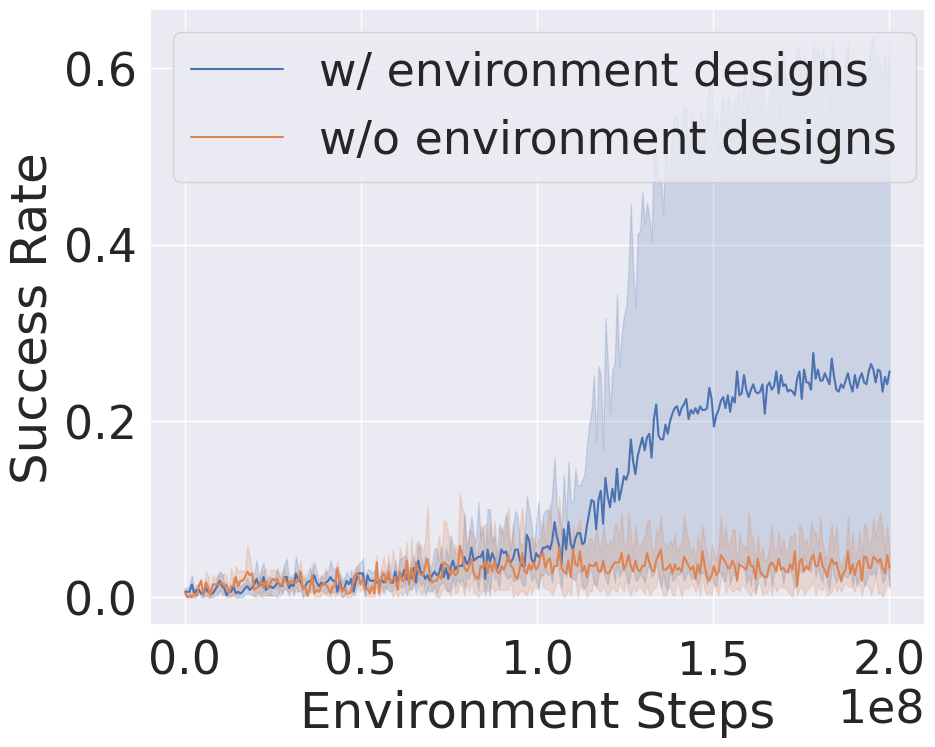

In [7]:
# 取部分数据做图
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.lineplot(x="time/total_timesteps", y="eval/success_rate", hue="algo", data=data_plot, ax=ax)

ax.set_xlabel("Environment Steps")
ax.set_ylabel("Success Rate")
# ax.legend(title="b")
# sns.move_legend(ax, "lower center", bbox_to_anchor=(.5, 0.98), ncol=5, title=None, frameon=False, fontsize="x-small")
sns.move_legend(ax, loc="upper left", title=None)

f.savefig("flycraft_vs_pyfly_PPO_in_rl_success_rate.pdf", format="pdf", bbox_inches="tight")

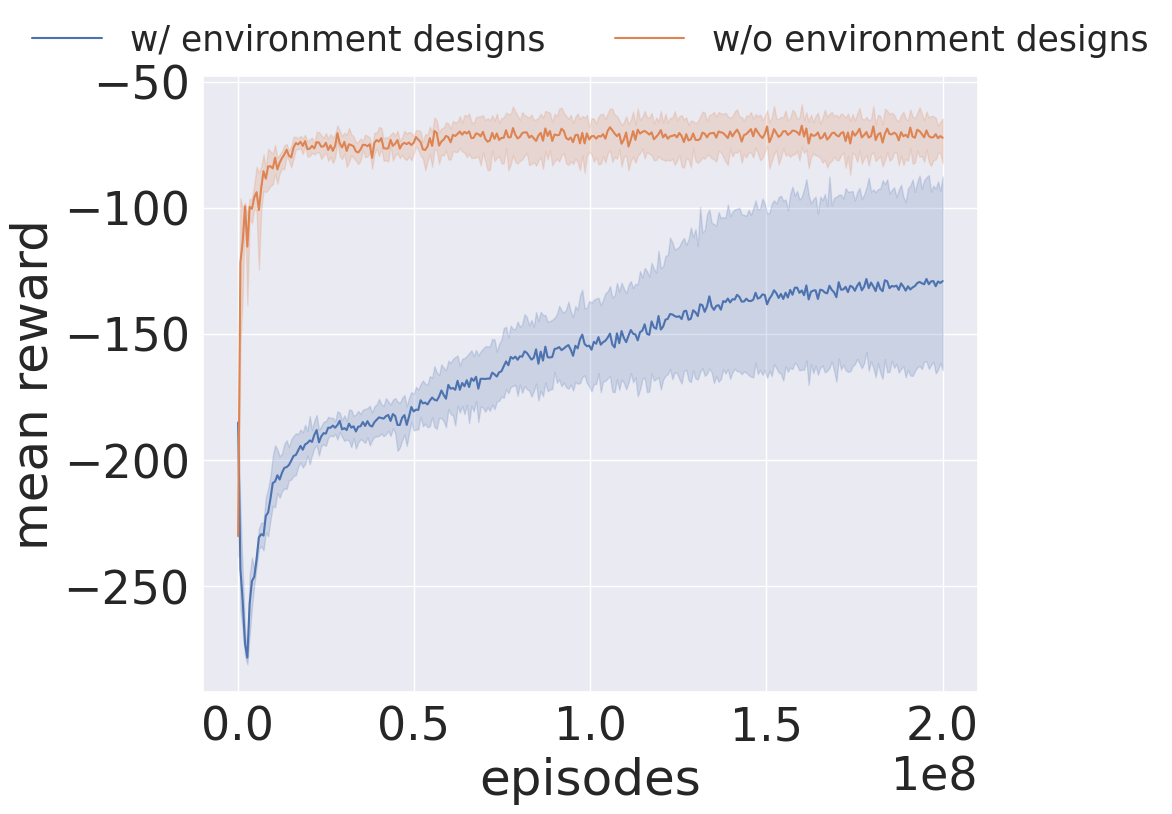

In [8]:
# 取部分数据做图
f2, ax2 = plt.subplots(figsize=(10, 8))
ax2 = sns.lineplot(x="time/total_timesteps", y="eval/mean_reward", hue="algo", data=data_plot, ax=ax2)
# ax.axhline(y=0.61, c='g', ls='--', lw=1, label='bc')
# ax.axhline(y=0., c='b', ls='--', lw=1, label='rl_single')
# plt.legend()  # 显示水平辅助线的图例
# ax.set_xlabel("训练步数", fontproperties=SimHei)
# ax.set_ylabel("任务完成率", fontproperties=SimHei)
ax2.set_xlabel("episodes")
ax2.set_ylabel("mean reward")
# ax2.legend(title="b")
sns.move_legend(ax2, "lower center", bbox_to_anchor=(.5, 0.98), ncol=5, title=None, frameon=False, fontsize="x-small")

# ax2.set_title("generation = 1")

# f2.savefig("ppo_easy_reward_b_accumulate_reward.pdf", format="pdf", bbox_inches="tight")